## Diabetes ?

Sesuai dengan Badan Kesehatan Nasional Amerika Serikat (NIH), "Diabetes adalah penyakit yang terjadi ketika kadar glukosa darah Anda, juga disebut gula darah, terlalu tinggi. Glukosa darah merupakan sumber energi utama Anda dan berasal dari makanan yang Anda konsumsi. Insulin, hormon yang diproduksi oleh pankreas, membantu glukosa dari makanan masuk ke dalam sel untuk digunakan sebagai energi. Terkadang tubuh Anda tidak menghasilkan cukup insulin - atau tidak sama sekali - atau tidak menggunakan insulin dengan baik. Akibatnya, glukosa tetap berada dalam darah Anda dan tidak mencapai sel-sel Anda.

Apa saja jenis-jenis diabetes yang berbeda? Jenis diabetes yang paling umum adalah tipe 1, tipe 2, dan diabetes gestasional.

Referance: https://www.tumblr.com/artikelkesehatandangayahidup

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

## Load Data & Cek Info

In [ ]:
data = pd.read_csv('/work/diabetes.csv')
display(data.info(),data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Distribusi target

Grafik di bawah menunjukkan data gak seimbang. 

Jumlah orang non-diabetes = 268

Jumlah pasien diabetes = 500.

In [ ]:
# Pecah kumpulan data jadi sehat dan diabetes
healthy_patients = data[data['Outcome'] == 0]
diabetic_patients = data[data['Outcome'] != 0]


# Hitung jumlah sehat dan diabetes
healthy_count = healthy_patients.shape[0]
diabetic_count = diabetic_patients.shape[0]


# Buat diagram
bar_trace = go.Bar(x=[healthy_count, diabetic_count], y=['sehat', 'diabetes'], orientation='h', text=[healthy_count, diabetic_count], textposition='auto', opacity=0.8, marker=dict(color=['lightskyblue', 'gold'], line=dict(color='#000000', width=1.5)))
bar_layout = dict(title='Jumlah')
bar_fig = dict(data=[bar_trace], layout=bar_layout)

pie_trace = go.Pie(labels=['sehat', 'diabetes'], values=[healthy_count, diabetic_count], textfont=dict(size=15), opacity=0.8, marker=dict(colors=['lightskyblue', 'gold'], line=dict(color='#000000', width=1.5)))
pie_layout = dict(title='Distribusi')
pie_fig = dict(data=[pie_trace], layout=pie_layout)


# Display
py.iplot(bar_fig)
py.iplot(pie_fig)

Dari data distribusi data diatas bahwa data belum seimbang antara label yang akan diprediksi. Hal ini akan di oversamplingagar data seimbang

## Missing Value

Lihat di data.head() ada beberapa fitur valuenya = 0, ini tidak masuk akal dan ini menunjukkan nilai yang hilang. 

In [ ]:
# Replace nilai 0 jadi NaN
data[['BMI', 'Insulin', 'SkinThickness', 'BloodPressure', 'Glucose']] = data[['BMI', 'Insulin', 'SkinThickness', 'BloodPressure', 'Glucose']].replace(0,np.NaN)


# Cek missing value
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Jumlah Missing Values (Total & Persen)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)


# Display
missing_plot(data, 'Outcome')

Missing values :

Insulin = 48.7% - 374
SkinThickness = 29.56% - 227
BloodPressure = 4.56% - 35
BMI = 1.43% - 11
Glucose = 0.65% - 5

## Skewness

In [ ]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
SkinThickness               0.690619
Insulin                     2.166464
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [ ]:
#COBA - Yopi
from sklearn.impute import KNNImputer

# Define the imputer
knn_imputer = KNNImputer(n_neighbors=5)

# List of column names
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Imputation based on skewness
for col in cols:
    skewness = data[col].skew()
    if skewness < 0.5:
        # Mean imputation
        data[col].fillna(data[col].mean(), inplace=True)
    elif skewness >= 0.5 and skewness <= 1:
        # KNN imputation
        data[col] = knn_imputer.fit_transform(data[[col]])
    else:
        # End of distribution imputation
        data[col].fillna(data[col].mean() + 3*data[col].std(), inplace=True)


In [ ]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.532719
BloodPressure               0.137305
SkinThickness               0.822173
Insulin                    -0.210653
BMI                         0.598253
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Korelasi Data

In [ ]:
def correlation_plot(data):
    correlation = data.corr()
    matrix_cols = correlation.columns.tolist()
    corr_array = np.array(correlation)

    trace = go.Heatmap(z=corr_array, x=matrix_cols, y=matrix_cols, colorscale='blues')
    layout = go.Layout(title='Korelasi Metriks',
                       margin=dict(r=0, l=100, t=0, b=100),
                       yaxis=dict(tickfont=dict(size=12)),
                       xaxis=dict(tickfont=dict(size=12)),
                      )
    fig = go.Figure(data=[trace], layout=layout)
    py.iplot(fig)


# Display
correlation_plot(data)

In [ ]:
# COBA - yopi
import pandas as pd
from scipy.stats import pointbiserialr

# Set the significance level (alpha)
alpha = 0.05

# Create a copy of the data
train_data = data.copy()

# Drop the 'Outcome' column from the train_data
train_data.drop('Outcome', axis=1, inplace=True)

# Initialize empty lists to store results
columns = []
correlations = []
p_values = []

# Calculate correlation for each numeric column
for col in train_data:
    pbc = pointbiserialr(data['Outcome'], data[col])
    columns.append(col)
    correlations.append(pbc.correlation)
    p_values.append(pbc.pvalue)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Column': columns,
    'Correlation': correlations,
    'P-value': p_values
})

# Add a column indicating statistical significance
results_df['Significant'] = results_df['P-value'] <= alpha

# Sort the DataFrame by absolute correlation values
results_df = results_df.sort_values(
    by='Correlation', key=abs, ascending=False).reset_index(drop=True)

# Display the results
print(results_df)

                     Column  Correlation       P-value  Significant
0                   Glucose     0.492928  2.909252e-48         True
1                       BMI     0.311924  8.595301e-19         True
2                       Age     0.238356  2.209975e-11         True
3               Pregnancies     0.221898  5.065127e-10         True
4             SkinThickness     0.215299  1.663550e-09         True
5  DiabetesPedigreeFunction     0.173844  1.254607e-06         True
6             BloodPressure     0.166074  3.709288e-06         True
7                   Insulin     0.129264  3.287474e-04         True


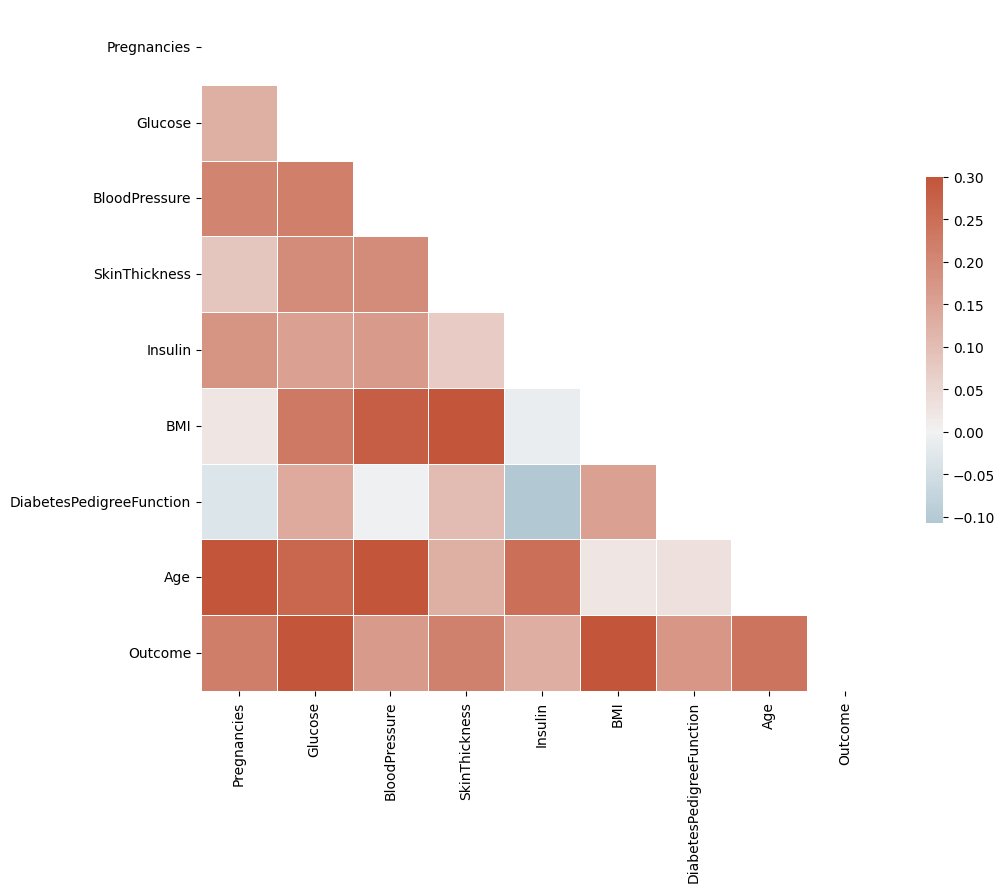

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [ ]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.177699,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.152685,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.165359,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.073027,0.542398,0.100966,0.127872,0.215299
Insulin,0.177699,0.152685,0.165359,0.073027,1.000000,-0.010990,-0.107678,0.250112,0.129264
BMI,0.021565,0.230941,0.281268,0.542398,-0.010990,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,-0.107678,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.250112,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.129264,0.311924,0.173844,0.238356,1.000000


## Outlier

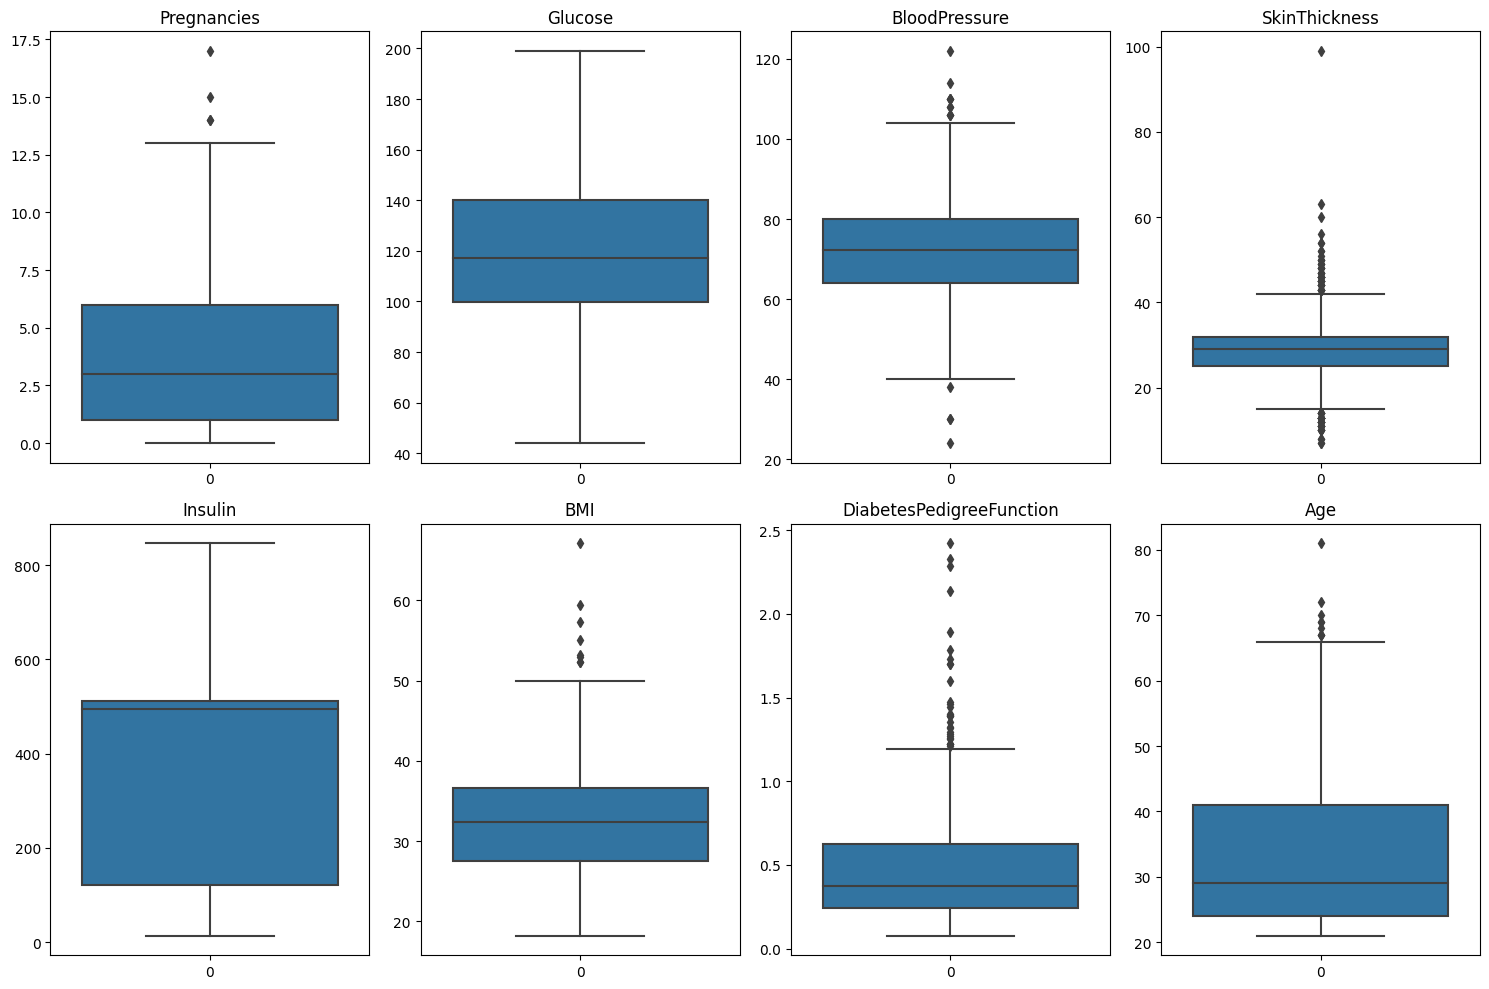

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of column names
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a new figure
plt.figure(figsize=(15,10))

# For each column
for i, col in enumerate(cols):
    # Create a subplot for each column
    plt.subplot(2, 4, i+1)
    
    # Create a boxplot for the column
    sns.boxplot(data[col])
    
    # Set the title of the subplot to the name of the column
    plt.title(col)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# For each column
for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the acceptable range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Replace outliers with the bounds
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])


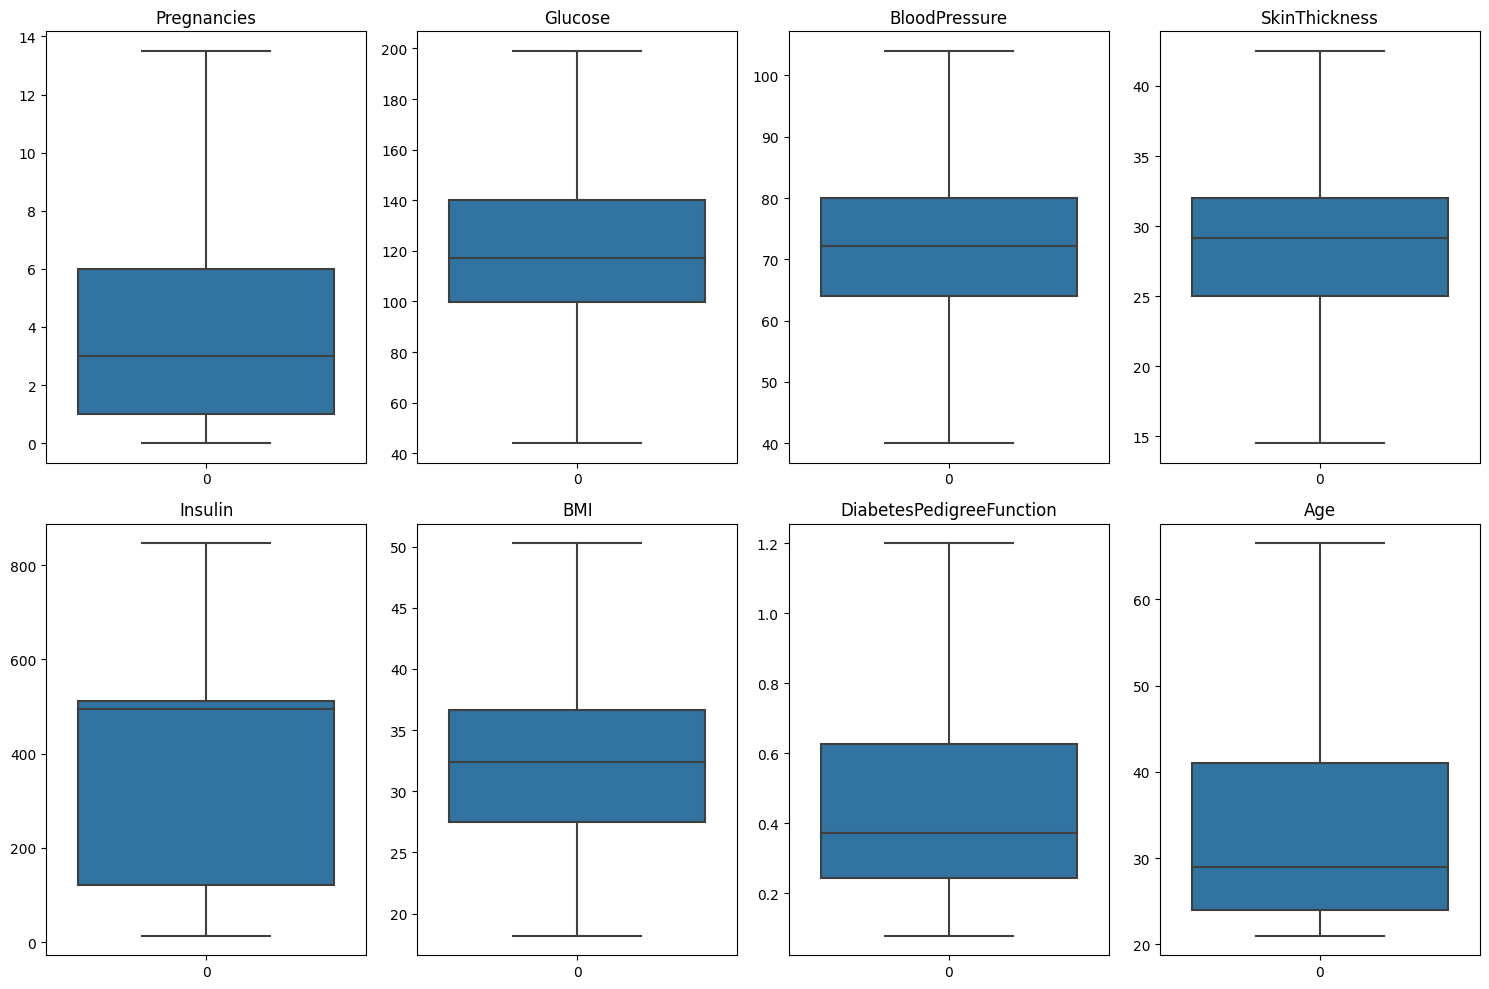

In [ ]:
plt.figure(figsize=(15,10))

# For each column
for i, col in enumerate(cols):
    # Create a subplot for each column
    plt.subplot(2, 4, i+1)
    
    # Create a boxplot for the column
    sns.boxplot(data[col])
    
    # Set the title of the subplot to the name of the column
    plt.title(col)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.686763,72.376538,28.911883,329.072324,32.395615,0.458914,33.199870,0.348958
std,3.344157,30.435949,11.696836,7.443497,197.460762,6.667466,0.285596,11.628404,0.476951
min,0.000000,44.000000,40.000000,14.500000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,495.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,511.875789,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,104.000000,42.500000,846.000000,50.250000,1.200000,66.500000,1.000000


In [ ]:
df_diabetes = pd.read_csv('/work/w2-data_prepocessed.csv')

# DATA MODELLING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

random_state = check_random_state(24)

features = df_diabetes.values[:,:8]
labels = df_diabetes.values[:,8:]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=random_state)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=random_state)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

2024-02-23 13:19:19.209892: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-23 13:19:19.340589: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-23 13:19:19.344735: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-23 13:19:19.344750: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

### Narrow and Shallow

In [ ]:
model_ns = Sequential()
model_ns.add(Dense(8, input_dim=8, activation='relu'))  # Input layer
model_ns.add(Dense(1, activation='sigmoid'))  # Output layer

2024-02-23 13:19:20.506759: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-02-23 13:19:20.506788: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-02-23 13:19:20.506803: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-bed84686-c89c-47ab-a6e4-6d5495dfbf02): /proc/driver/nvidia/version does not exist
2024-02-23 13:19:20.507008: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model_ns.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint('ns_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='min')
# Fit the model with ModelCheckpoint and EarlyStopping
model_ns.fit(X_train_res, y_train_res, batch_size=64, epochs=1000, validation_split=0.3, callbacks=[checkpoint])

1/9 [==>...........................] - ETA: 0s - loss: 0.4054 - accuracy: 0.8125
Epoch 751: val_accuracy did not improve from 0.09504
9/9 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.7669 - val_loss: 0.7320 - val_accuracy: 0.5702
Epoch 752/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4849 - accuracy: 0.7344
Epoch 752: val_accuracy did not improve from 0.09504
9/9 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.7722 - val_loss: 0.7086 - val_accuracy: 0.5744
Epoch 753/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3649 - accuracy: 0.8750
Epoch 753: val_accuracy did not improve from 0.09504
9/9 [==============================] - 0s 7ms/step - loss: 0.4622 - accuracy: 0.7740 - val_loss: 0.7696 - val_accuracy: 0.5537
Epoch 754/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4713 - accuracy: 0.7500
Epoch 754: val_accuracy did not improve from 0.09504
9/9 [==============================] -

In [ ]:
loss, accuracy = model_ns.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.7013
Accuracy: 70.13


### Narrow and Wide

In [ ]:
model_nw = Sequential()
model_nw.add(Dense(8, input_dim=8, activation='relu'))  # Input layer
model_nw.add(Dense(4, activation='relu'))
model_nw.add(Dense(2, activation='relu'))  
model_nw.add(Dense(1, activation='sigmoid'))  # Output layer

In [ ]:
model_nw.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint('nw_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='min')
# Fit the model with ModelCheckpoint and EarlyStopping
model_nw.fit(X_train_res, y_train_res, batch_size=64, epochs=1000, validation_split=0.3, callbacks=[checkpoint])

1/9 [==>...........................] - ETA: 0s - loss: 0.4765 - accuracy: 0.7188
Epoch 751: val_accuracy did not improve from 0.11570
9/9 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.7722 - val_loss: 0.8241 - val_accuracy: 0.4959
Epoch 752/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3200 - accuracy: 0.8438
Epoch 752: val_accuracy did not improve from 0.11570
9/9 [==============================] - 0s 7ms/step - loss: 0.4516 - accuracy: 0.7722 - val_loss: 0.6996 - val_accuracy: 0.5702
Epoch 753/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4615 - accuracy: 0.7812
Epoch 753: val_accuracy did not improve from 0.11570
9/9 [==============================] - 0s 3ms/step - loss: 0.4532 - accuracy: 0.7794 - val_loss: 0.8402 - val_accuracy: 0.5000
Epoch 754/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4312 - accuracy: 0.7344
Epoch 754: val_accuracy did not improve from 0.11570
9/9 [==============================] -

In [ ]:
loss, accuracy = model_nw.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.6753
Accuracy: 67.53


### Deep and Shallow

In [ ]:
model_ds = Sequential()
model_ds.add(Dense(64, input_dim=8, activation='relu'))  # Input layer
model_ds.add(Dense(1, activation='sigmoid'))  # Output layer

In [ ]:
model_ds.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint('ds_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='min')
# Fit the model with ModelCheckpoint and EarlyStopping
model_ds.fit(X_train_res, y_train_res, batch_size=64, epochs=1000, validation_split=0.3, callbacks=[checkpoint])

1/9 [==>...........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.8438
Epoch 751: val_accuracy did not improve from 0.07851
9/9 [==============================] - 0s 8ms/step - loss: 0.4100 - accuracy: 0.7972 - val_loss: 0.7163 - val_accuracy: 0.6612
Epoch 752/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4725 - accuracy: 0.7969
Epoch 752: val_accuracy did not improve from 0.07851
9/9 [==============================] - 0s 3ms/step - loss: 0.4091 - accuracy: 0.8167 - val_loss: 0.4797 - val_accuracy: 0.7769
Epoch 753/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3825 - accuracy: 0.8281
Epoch 753: val_accuracy did not improve from 0.07851
9/9 [==============================] - 0s 7ms/step - loss: 0.4061 - accuracy: 0.8078 - val_loss: 0.5536 - val_accuracy: 0.7273
Epoch 754/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3873 - accuracy: 0.7969
Epoch 754: val_accuracy did not improve from 0.07851
9/9 [==============================] -

In [ ]:
loss, accuracy = model_ds.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.8760 - accuracy: 0.6883
Accuracy: 68.83


### Deep and Wide

In [ ]:
model_dw = Sequential()
model_dw.add(Dense(64, input_dim=8, activation='relu'))  # Input layer
model_dw.add(Dense(64, activation='relu'))
model_dw.add(Dense(32, activation='relu'))
model_dw.add(Dense(32, activation='relu'))  
model_dw.add(Dense(16, activation='relu')) 
model_dw.add(Dense(16, activation='relu'))  
model_dw.add(Dense(8, activation='relu'))
model_dw.add(Dense(4, activation='relu'))  
model_dw.add(Dense(1, activation='sigmoid'))  # Output layer

In [ ]:
model_dw.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# early stopping
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=50)
# Save the model after every epoch
checkpoint = ModelCheckpoint('dw_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='min')
# Fit the model with ModelCheckpoint and EarlyStopping
model_dw.fit(X_train_res, y_train_res, batch_size=64, epochs=1000, validation_split=0.3, callbacks=[checkpoint])

1/9 [==>...........................] - ETA: 0s - loss: 0.1998 - accuracy: 0.8750
Epoch 751: val_accuracy did not improve from 0.09504
9/9 [==============================] - 0s 8ms/step - loss: 0.1800 - accuracy: 0.9181 - val_loss: 0.5580 - val_accuracy: 0.7686
Epoch 752/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.1072 - accuracy: 0.9688
Epoch 752: val_accuracy did not improve from 0.09504
9/9 [==============================] - 0s 4ms/step - loss: 0.1448 - accuracy: 0.9359 - val_loss: 0.5580 - val_accuracy: 0.7934
Epoch 753/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.1354 - accuracy: 0.9531
Epoch 753: val_accuracy did not improve from 0.09504
9/9 [==============================] - 0s 9ms/step - loss: 0.1297 - accuracy: 0.9448 - val_loss: 0.4118 - val_accuracy: 0.8099
Epoch 754/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.1083 - accuracy: 0.9531
Epoch 754: val_accuracy did not improve from 0.09504
9/9 [==============================] -

In [ ]:
loss, accuracy = model_dw.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 2ms/step - loss: 1.8248 - accuracy: 0.6883
Accuracy: 68.83


In [ ]:
model_dw.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                576       
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 8)                

In [ ]:
X_train_res.shape

(804, 8)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from scikeras.wrappers import KerasClassifier

# # Function to create model, required for KerasClassifier
# def create_model():
#     model = Sequential()
#     model.add(Dense(16, input_dim=8, activation='relu'))
#     model.add(Dense(16, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

# # Create model
# model_hpo = KerasClassifier(model=create_model, verbose=0)

# # Define the grid search parameters
# param_grid = {'batch_size': [10, 20, 30, 40],
#               'epochs': [20, 50, 100]}

# # Create Grid Search
# grid = GridSearchCV(estimator=model_hpo, param_grid=param_grid, cv=3)
# grid_result = grid.fit(X_train_res, y_train_res)

# # Summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.730100 using {'batch_size': 10, 'epochs': 100}


In [ ]:
# from keras.callbacks import LearningRateScheduler
# from keras.callbacks import ModelCheckpoint

# # Define a learning rate schedule. For example, decreasing the learning rate by 0.95 every epoch
# def lr_schedule(epoch):
#     initial_lr = 0.01
#     drop = 0.95
#     epochs_drop = 1.0
#     lr = initial_lr * (drop ** ((1+epoch) / epochs_drop))
#     return lr

# lr_scheduler = LearningRateScheduler(lr_schedule)

# # Save the model after every epoch
# checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# # Fit the model with the ModelCheckpoint
# history = model.fit(X_train_res, y_train_res, batch_size=20, epochs=50, validation_split=0.2, callbacks=[lr_scheduler, checkpoint])


Epoch 1/50
33/33 [==============================] - 1s 18ms/step - loss: 0.6956 - accuracy: 0.6983 - val_loss: 1.0436 - val_accuracy: 0.3540 - lr: 0.0095
Epoch 2/50
33/33 [==============================] - 0s 14ms/step - loss: 0.6243 - accuracy: 0.6983 - val_loss: 0.8865 - val_accuracy: 0.4410 - lr: 0.0090
Epoch 3/50
33/33 [==============================] - 0s 14ms/step - loss: 0.5634 - accuracy: 0.7107 - val_loss: 0.6942 - val_accuracy: 0.5217 - lr: 0.0086
Epoch 4/50
33/33 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7574 - val_loss: 0.8496 - val_accuracy: 0.4348 - lr: 0.0081
Epoch 5/50
33/33 [==============================] - 0s 11ms/step - loss: 0.5393 - accuracy: 0.7356 - val_loss: 0.4507 - val_accuracy: 0.7888 - lr: 0.0077
Epoch 6/50
33/33 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.7154 - val_loss: 0.5631 - val_accuracy: 0.6708 - lr: 0.0074
Epoch 7/50
33/33 [==============================] - 0s 2ms/step - loss: 0.5120

In [ ]:
# loss, accuracy = model.evaluate(X_test, y_test)
# print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 1ms/step - loss: 0.5350 - accuracy: 0.7208
Accuracy: 72.08


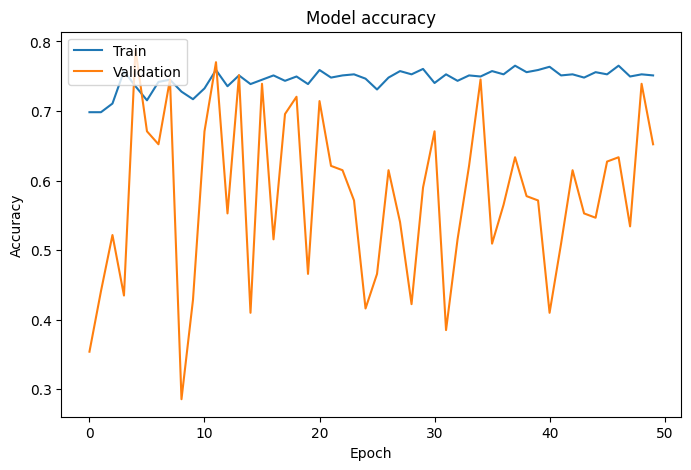

In [ ]:
# import matplotlib.pyplot as plt

# # Plot training & validation accuracy values
# plt.figure(figsize=[8,5])
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()


In [ ]:
X_train_res

array([[  0.        , 146.        ,  70.        , ...,  37.9       ,
          0.334     ,  28.        ],
       [  0.        , 117.        ,  66.        , ...,  30.8       ,
          0.493     ,  22.        ],
       [  0.        , 121.        ,  66.        , ...,  34.3       ,
          0.203     ,  33.        ],
       ...,
       [  0.        , 145.13957658,  72.0694768 , ...,  43.32066756,
          0.58868533,  30.58127026],
       [  1.46262067, 109.25462094,  90.83641396, ...,  46.77627591,
          0.17858842,  23.80606899],
       [  6.54150818, 119.51383606,  84.54150818, ...,  31.92468857,
          0.36449758,  21.75691803]])

In [ ]:
# Normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_train

array([[0.        , 0.65806452, 0.46875   , ..., 0.61466459, 0.22401434,
        0.15384615],
       [0.        , 0.47096774, 0.40625   , ..., 0.39313573, 0.36648746,
        0.02197802],
       [0.        , 0.49677419, 0.40625   , ..., 0.50234009, 0.10663082,
        0.26373626],
       ...,
       [0.37037037, 0.50322581, 0.71875   , ..., 0.51482059, 0.18458781,
        0.26373626],
       [0.51851852, 0.74193548, 0.40625   , ..., 0.38065523, 0.26792115,
        0.32967033],
       [0.07407407, 0.2516129 , 0.4375    , ..., 0.        , 0.48387097,
        0.13186813]])

In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_train = X_train.astype(np.float32)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu',input_shape=(8,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=33, epochs=50, validation_split=0.2)


Epoch 1/50
15/15 [==============================] - 1s 21ms/step - loss: 0.6820 - accuracy: 0.6375 - val_loss: 0.6946 - val_accuracy: 0.5528
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.6733 - accuracy: 0.6802 - val_loss: 0.6947 - val_accuracy: 0.5528
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.6666 - accuracy: 0.6802 - val_loss: 0.6956 - val_accuracy: 0.5528
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.6612 - accuracy: 0.6802 - val_loss: 0.6968 - val_accuracy: 0.5528
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.6570 - accuracy: 0.6802 - val_loss: 0.6982 - val_accuracy: 0.5528
Epoch 6/50
15/15 [==============================] - 0s 12ms/step - loss: 0.6537 - accuracy: 0.6802 - val_loss: 0.6997 - val_accuracy: 0.5528
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.6802 - val_loss: 0.7012 - val_accuracy: 0.5528
Epoch 8/50
15/15 [

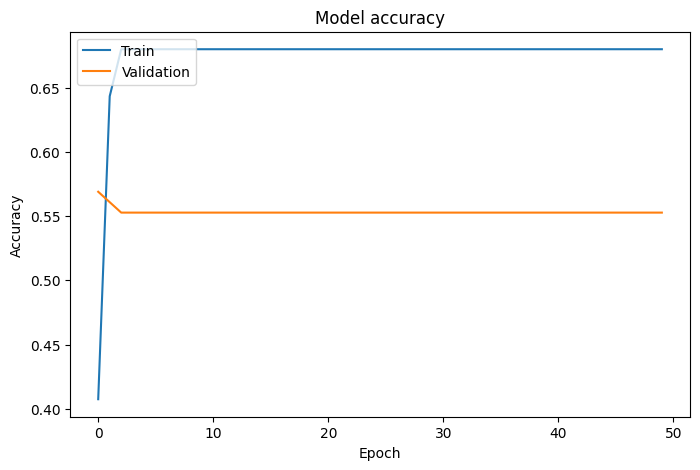

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bed84686-c89c-47ab-a6e4-6d5495dfbf02' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>